# Objetivos
Para datos de ingresos hospitalarios acumulados. Por cada provincia (y por el total de Andalucía):
1. Error relativo en función del número de puntos que se han tomado. (Ver David GG en Zappa).
2. Sobre el modelo que prediga mejor (en general). Puntos que se usan para predicción en un color, puntos que se predicen en otro. Visualizamos los puntos y la predicción. Añadir la curva del ajuste.
3. Otra gráfica usando todos los puntos para la predicción (a futuro). Devolver la lista de valores fecha - cantidad de ingresados.
4. ¿Ingresos diarios? Derivar la curva (cdf, pdf).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.insert(0, "../src")

from preprocessing.andalucia import preprocess_andalucia
from prediction.fit import temporal_validation_metric
from prediction.models import *

In [2]:
# Andalucia data
path = "../data/series_provincias_andalucia.csv"
dataset = pd.read_csv(path)
dataset = preprocess_andalucia(dataset)

dataset

,region,resultado,ingreso,uci,defuncion,curado
dia,,,,,,
2020-03-14,almeria,14,0,0,0,0
2020-03-15,almeria,14,1,0,0,0
2020-03-16,almeria,23,1,1,0,0
2020-03-17,almeria,26,3,0,0,0
2020-03-18,almeria,30,3,0,0,0
...,...,...,...,...,...,...
2020-04-04,sevilla,1535,712,68,75,53
2020-04-05,sevilla,1602,747,100,93,82
2020-04-06,sevilla,1663,778,101,97,95


In [4]:
region = "andalucia"
mask_region = dataset["region"] == region

y = dataset.loc[mask_region, "ingreso"].values
x = dataset.loc[mask_region].index.values

/home/daniprec/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
../src/prediction/models.py:55: RuntimeWarning: overflow encountered in exp
  y = (A * np.exp(-np.exp(((u / A) * (d - x)) + 1))) + y0
../src/prediction/models.py:74: RuntimeWarning: overflow encountered in exp
  y = a * np.exp(b * x) + c


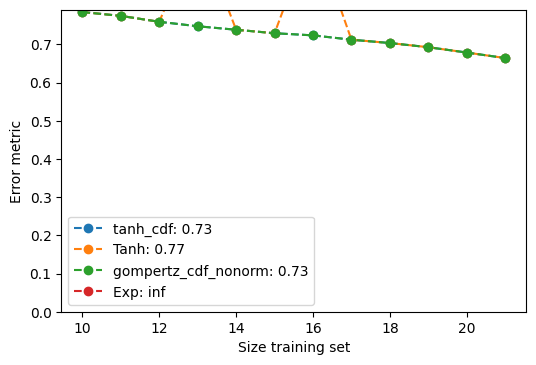

In [5]:
plt.figure(dpi=100)
for model, params in dic_models.items():
    metric_agg = temporal_validation_metric(eval(model),
                                            x, y,
                                            val_size=5, min_train_size=10,
                                            params0=None, plot=True)